In [840]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
import pickle

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

In [4]:
with open('/Users/krk/flatiron/mod_2/project/df_clean.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [745]:
df = b.copy()

In [1443]:
b.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'type', 'paint_color', 'image_url',
       'description', 'state', 'lat', 'long', 'age'],
      dtype='object')

## Feature Engineering

### Custom Vehicles

In [805]:
df['custom'] = 1 * df['description'].str.contains('custom',case = False)

In [1274]:
#_Two Sample t test_

# null: u(custom) = u(not custom)

# alt: u(custom) != u(not custom)

custom = df[df['custom'] == 1]
not_custom = df[df['custom'] == 0]

pop1 = custom['price']
pop2 = not_custom['price']

from scipy import stats

t_stat, p_val = stats.ttest_ind(pop1, pop2)

print(t_stat, p_val*2)

169.5287133640786 0.0


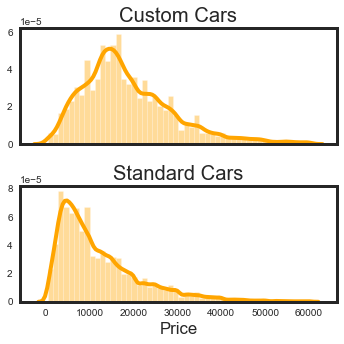

In [1275]:
plt.style.use('fivethirtyeight')
sns.set_style('white')
fig1, axes = plt.subplots(2,1,sharex=True, figsize = (5,5))
sns.distplot(pop1,ax=axes[0], color = 'orange')
sns.distplot(pop2,ax=axes[1], color = 'orange')
axes[0].set_title('Custom Cars')
axes[0].set_xlabel('')
axes[1].set_title('Standard Cars')
axes[1].set_xlabel('Price')
plt.tight_layout()

There is a statistically significant difference between the means of custom cars and non custom cars

---

### New Tires

In [806]:
df['new_tires'] = 1 * df['description'].str.contains('new tire',case = False)

In [611]:
#_Two Sample t test_

# null: u(new tires) = u(old tires)

# alt: u(new tires) != u(old tires)

new_tire = df[df['new_tires'] == 1]
old_tire = df[df['new_tires'] == 0]

pop1 = new_tire['price']
pop2 = old_tire['price']

from scipy import stats

t_stat, p_val = stats.ttest_ind(pop1, pop2)

print(t_stat, p_val*2)

46.074560751223395 0.0


In [612]:
pop1.mean()

11044.56225101389

In [613]:
pop2.mean()

13938.56444985108

There is a statistically significant difference between the means of vehicles with new tires and vehicles without new tires

---

### Bluetooth

In [807]:
df['bluetooth'] = 1 * df['description'].str.contains('bluetooth',case = False)

In [1276]:
#_Two Sample t test_

# null: u(bluetooth) = u(no bluetooth)

# alt: u(bluetooth) != u(no bluetooth)

bluetooth = df[df['bluetooth'] == 1]
no_bluetooth = df[df['bluetooth'] == 0]

pop1 = bluetooth['price']
pop2 = no_bluetooth['price']

from scipy import stats

t_stat, p_val = stats.ttest_ind(pop1, pop2)

print(t_stat, p_val*2)

145.50267685597595 0.0


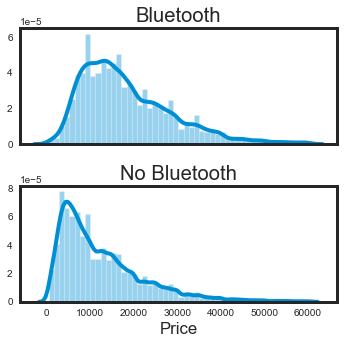

In [1277]:
plt.style.use('fivethirtyeight')
sns.set_style('white')
fig2, axes = plt.subplots(2,1,sharex=True, figsize = (5,5))
sns.distplot(pop1,ax=axes[0])
sns.distplot(pop2,ax=axes[1])
axes[0].set_title('Bluetooth')
axes[0].set_xlabel('')
axes[1].set_title('No Bluetooth')
axes[1].set_xlabel('Price')
plt.tight_layout()

There is a statistically significant difference between the means of vehicles with bluetooth and vehicles without

---

### Power Features

In [808]:
df['power_features'] = 1 * df['description'].str.contains(r'[ ,]power',case = False, regex = True)

In [616]:
#_Two Sample t test_

# null: u(powered) = u(not powered)

# alt: u(powered) != u(not powered)

powered = df[df['power_features'] == 1]
non_powered = df[df['power_features'] == 0]

pop1 = powered['price']
pop2 = non_powered['price']

from scipy import stats

t_stat, p_val = stats.ttest_ind(pop1, pop2)

print(t_stat, p_val*2)

110.50808594910723 0.0


There is a statistically significant difference between the means of vehicles with power features and vehicles without them

### Rust

In [809]:
df['rust'] = 1 * df['description'].str.contains('rust',case = False)

In [639]:
#_Two Sample t test_

# null: u(rust) = u(no rust)

# alt: u(rust) != u(no rust)

rust = df[df['rust'] == 1]
no_rust = df[df['rust'] == 0]

pop1 = rust['price']
pop2 = no_rust['price']

from scipy import stats

t_stat, p_val = stats.ttest_ind(pop1, pop2)

print(t_stat, p_val*2)

86.9202309385383 0.0


There is a statistically significant difference between the means of vehicles with rust and vehicles without rust

---

### Luxury

In [810]:
df['luxury'] = 1 * df['description'].str.contains('luxury',case = False)

In [725]:
#_Two Sample t test_

# null: u(luxury) = u(not luxury)

# alt: u(luxury) != u(not luxury)

luxury = df[df['luxury'] == 1]
not_luxury = df[df['luxury'] == 0]

pop1 = luxury['price']
pop2 = not_luxury['price']

from scipy import stats

t_stat, p_val = stats.ttest_ind(pop1, pop2)

print(t_stat, p_val*2)

58.34311304249912 0.0


In [732]:
print(pop1.mean(), pop2.mean())

17663.14289109664 13493.231815087966


There is a statistically significant difference between the means of luxury vehicles and non luxury vehicles

---

### Third Row

In [937]:
df['third_row'] = 1 * df['description'].str.contains(r'3rd|third\s?row',case = False, regex = True)

In [735]:
#_Two Sample t test_

# null: u(third row) = u(no third row)

# alt: u(third row) != u(no third row)

third_row = df[df['third_row'] == 1]
no_third_row = df[df['third_row'] == 0]

pop1 = third_row['price']
pop2 = no_third_row['price']

from scipy import stats

t_stat, p_val = stats.ttest_ind(pop1, pop2)

print(t_stat, p_val*2)

32.551662904362566 8.334842252716651e-232


In [736]:
print(pop1.mean(), pop2.mean())

15611.089139853682 13573.507422290306


There is a statistically significant difference between the means of vehicles with third rows and vehicles without them

---

### Used

In [853]:
df['used'] = 1 * df['description'].str.contains('used',case = False)

In [854]:
#_Two Sample t test_

# null: u(used) = u(not used)

# alt: u(used) != u(not used)

used = df[df['used'] == 1]
not_used = df[df['used'] == 0]

pop1 = used['price']
pop2 = not_used['price']

from scipy import stats

t_stat, p_val = stats.ttest_ind(pop1, pop2)

print(t_stat, p_val*2)

140.11954673085563 0.0


In [855]:
print(pop1.mean(), pop2.mean())

17049.527966223108 12204.54479179919


There is a statistically significant difference between the means of vehicles with used descriptions and vehicles without them

---

### Sport

In [885]:
df['description'].str.contains('sport',case = False).sum()

83750

In [886]:
df['sport'] = 1 * df['description'].str.contains('sport',case = False)

In [1278]:
#_Two Sample t test_

# null: u(sport) = u(not sport)

# alt: u(sport) != u(not sport)

sport = df[df['sport'] == 1]
not_sport = df[df['sport'] == 0]

pop1 = sport['price']
pop2 = not_sport['price']

from scipy import stats

t_stat, p_val = stats.ttest_ind(pop1, pop2)

print(t_stat, p_val*2)

105.68673388249228 0.0


In [888]:
print(pop1.mean(), pop2.mean())

16938.699880597014 12810.814108053008


There is a statistically significant difference between the means of vehicles with sport features and vehicles without them

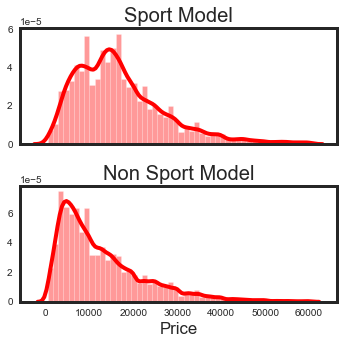

In [1279]:
plt.style.use('fivethirtyeight')
sns.set_style('white')
fig3, axes = plt.subplots(2,1,sharex=True, figsize = (5,5))
sns.distplot(pop1,ax=axes[0], color = 'red')
sns.distplot(pop2,ax=axes[1], color = 'red')
axes[0].set_title('Sport Model')
axes[0].set_xlabel('')
axes[1].set_title('Non Sport Model')
axes[1].set_xlabel('Price')
plt.tight_layout()

In [1284]:
fig1.savefig('custom_feature_dist.png', facecolor = 'white', bbox_inches = 'tight')
fig2.savefig('bluetooth_feature_dist.png', facecolor = 'white', bbox_inches = 'tight')
fig3.savefig('sport_feature_dist.png', facecolor = 'white', bbox_inches = 'tight')

---

### Cash

In [1031]:
df['cash'] = 1 * df['description'].str.contains('cash',case = False)

In [1032]:
#_Two Sample t test_

# null: u(cash) = u(no cash)

# alt: u(cash) != u(no cash)

cash = df[df['cash'] == 1]
no_cash = df[df['cash'] == 0]

pop1 = cash['price']
pop2 = no_cash['price']

from scipy import stats

t_stat, p_val = stats.ttest_ind(pop1, pop2)

print(t_stat, p_val*2)

-56.7489945260634 0.0


In [1003]:
print(pop1.mean(), pop2.mean())

11215.821873699428 14069.930808641473


There is a statistically significant difference between the means of cash sales and non cash sales

---

### Down Payment

In [1089]:
df['down_payment'] = 1 * ((df['price'] < 5000) & (df['odometer'] < 30000))

In [1144]:
#_Two Sample t test_

# null: u(down payment) = u(no down payment)

# alt: u(down payment) != u(no down payment)

down = df[df['down_payment'] == 1]
no_down = df[df['down_payment'] == 0]

pop1 = down['year']
pop2 = no_down['year']

from scipy import stats

t_stat, p_val = stats.ttest_ind(pop1, pop2)

print(t_stat, p_val*2)

2.3344194097137403 0.039148584514104606


In [1145]:
print(pop1.mean(), pop2.mean())

2010.4884233737596 2009.7902652309601


There is a statistically significant difference between the means of vehicles whose price is suspected of being a downpayment and those that aren't

---

### Classic

In [1156]:
df['classic'] = 1 * (df['year'] < 1970)

In [1264]:
#_Two Sample t test_

# null: u(classic) = u(non classic)

# alt: u(classic) != u(non classic)

classic = df[df['classic'] == 1]
non_classic = df[df['classic'] == 0]

pop1 = classic['price']
pop2 = non_classic['price']

from scipy import stats

t_stat, p_val = stats.ttest_ind(pop1, pop2)

print(t_stat, p_val*2)

28.990990312833485 2.7281902404557375e-184


In [1108]:
print(pop1.mean(), pop2.mean())

18090.67527509544 13673.238623436484


There is a statistically significant difference between the means of classic cars and non classic cars

---

In [1305]:
target = df[['price']]

continuous = ['year','odometer','age']

categorical = ['manufacturer','condition','cylinders','fuel','title_status',
               'transmission','drive','type','paint_color', 'state', 'custom',
               'new_tires', 'bluetooth', 'power_features', 'rust', 'luxury', 'used',
               'sport', 'third_row', 'cash', 'down_payment', 'classic']

In [1306]:
target.reset_index(inplace=True)

In [1307]:
target.drop(['index'],axis=1,inplace=True)

/Users/krk/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


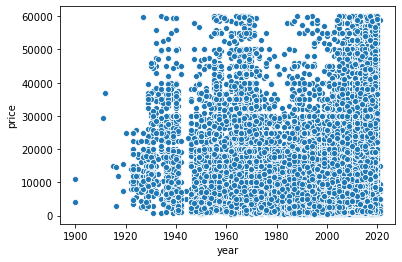

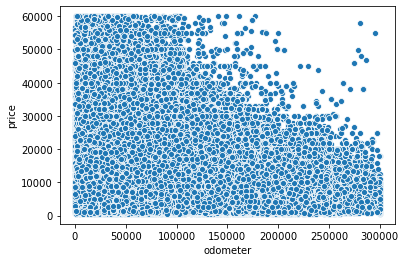

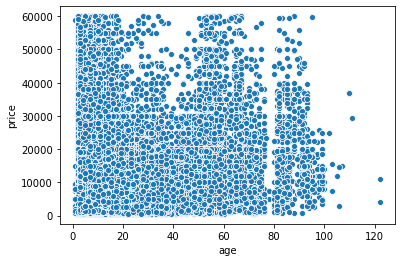

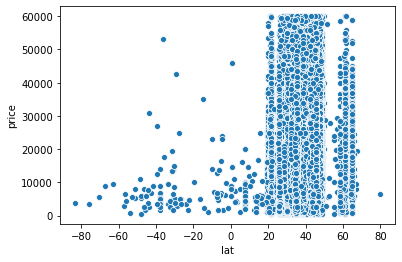

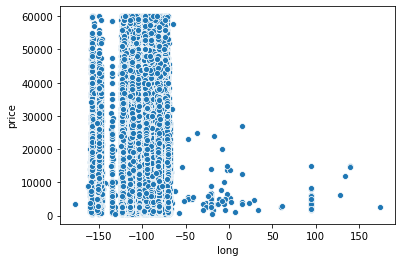

In [10]:
for item in continuous:
    sns.scatterplot(df[item],df['price'])
    plt.show()

# Begin building preprocessed data

In [1308]:
df_cat = df[categorical]
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True)
df_cat_dummies.reset_index(inplace=True)
df_cat_dummies.drop(['index'],axis=1,inplace=True)
df_cat_dummies.head()

,custom,new_tires,bluetooth,power_features,rust,luxury,used,sport,third_row,cash,down_payment,classic,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_morgan,manufacturer_nan,manufacturer_nissan,manufacturer_pontiac,manufacturer_porche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,drive_fwd,drive_rwd,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1309]:
df_cont = df[continuous].copy()
df_cont.head()

,year,odometer,age
0,2012.0,84659.333333,10.0
1,2014.0,76237.000000,8.0
2,2001.0,199000.000000,21.0
3,2004.0,54000.000000,18.0
7,2005.0,62800.000000,17.0


In [1310]:
df_cont.reset_index(inplace=True)
df_cont.drop(['index'],axis=1,inplace=True)
df_cont.isna().sum().sum()

0

In [1311]:
log_names = ["log_{}".format(col) for col in df_cont.columns]
log_cont = np.log(df_cont)
log_cont.columns = log_names
log_cont.reset_index(inplace=True)
log_cont.drop(['index'],axis=1,inplace=True)
log_cont.head()

,log_year,log_odometer,log_age
0,7.606885,11.346391,2.302585
1,7.607878,11.241602,2.079442
2,7.601402,12.201060,3.044522
3,7.602900,10.896739,2.890372
4,7.603399,11.047710,2.833213


In [1312]:
preprocessed = pd.concat([target,log_cont,df_cat_dummies],axis=1)
preprocessed.head()

,price,log_year,log_odometer,log_age,custom,new_tires,bluetooth,power_features,rust,luxury,used,sport,third_row,cash,down_payment,classic,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_morgan,manufacturer_nan,manufacturer_nissan,manufacturer_pontiac,manufacturer_porche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,drive_fwd,drive_rwd,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,3495,7.606885,11.346391,2.302585,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13750,7.607878,11.241602,2.079442,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2300,7.601402,12.201060,3.044522,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,9000,7.602900,10.896739,2.890372,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8500,7.603399,11.047710,2.833213,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1317]:
model_dict = {}

# 1 Degree Baseline Model against non_log target

In [1313]:
y = preprocessed['price']
X = preprocessed.drop(['price'],axis=1)

In [1314]:
poly = PolynomialFeatures(degree=1, include_bias=False, interaction_only = False)
poly_data = poly.fit_transform(X)
poly_columns = poly.get_feature_names(X.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [1315]:
X_train, X_test, y_train, y_test = train_test_split(df_poly,y,test_size=.25,random_state=42)

In [1316]:
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_hat_train = lm.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))

y_hat_test = lm.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Training Root Mean Squared Error:' , train_rmse)

print('Testing Root Mean Squared Error:' , test_rmse)

print(f"R2: {r2_score(y_test, y_hat_test)}")

Training Root Mean Squared Error: 5670.0410670419515
Testing Root Mean Squared Error: 5671.452301802454
R2: 0.6854337691036142


In [1319]:
model_dict['model1'] = [train_rmse, test_rmse, r2_score(y_test, y_hat_test)]

# 1 Degree on Log Target

In [1320]:
y_log = np.log(y_train)

In [1321]:
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

log_train_pred = lm_log.predict(X_train)
log_test_pred = lm_log.predict(X_test)

In [1322]:
y_train_pred = np.exp(log_train_pred)
y_test_pred = np.exp(log_test_pred)

In [1323]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Training Root Mean Squared Error:' , train_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))
print(f"R2: {r2_score(y_test, y_test_pred)}")

Training Root Mean Squared Error: 6752.515183561101
Training:  6752 vs. Testing:  6804
R2: 0.5472256094988226


In [1324]:
model_dict['model2'] = [train_rmse, test_rmse, r2_score(y_test, y_test_pred)]

# Poly2 on Continuous only against non log target

In [1325]:
preprocessed.head()

,price,log_year,log_odometer,log_age,custom,new_tires,bluetooth,power_features,rust,luxury,used,sport,third_row,cash,down_payment,classic,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_morgan,manufacturer_nan,manufacturer_nissan,manufacturer_pontiac,manufacturer_porche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,drive_fwd,drive_rwd,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,3495,7.606885,11.346391,2.302585,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13750,7.607878,11.241602,2.079442,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2300,7.601402,12.201060,3.044522,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,9000,7.602900,10.896739,2.890372,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8500,7.603399,11.047710,2.833213,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1326]:
df_cont = preprocessed[['log_year','log_odometer','log_age']]

In [1327]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only = False)
poly_data = poly.fit_transform(df_cont)
poly_columns = poly.get_feature_names(df_cont.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [1328]:
df_poly

,log_year,log_odometer,log_age,log_year^2,log_year log_odometer,log_year log_age,log_odometer^2,log_odometer log_age,log_age^2
0,7.606885,11.346391,2.302585,57.864692,86.310683,17.515499,128.740581,26.126030,5.301898
1,7.607878,11.241602,2.079442,57.879809,85.524739,15.820138,126.373620,23.376255,4.324077
2,7.601402,12.201060,3.044522,57.781317,92.745167,23.142640,148.865868,37.146401,9.269117
3,7.602900,10.896739,2.890372,57.804095,82.846824,21.975209,118.738928,31.495628,8.354249
4,7.603399,11.047710,2.833213,57.811682,84.000154,21.542052,122.051904,31.300520,8.027098
...,...,...,...,...,...,...,...,...,...
378045,7.603399,12.552729,2.833213,57.811682,95.443408,21.542052,157.570994,35.564558,8.027098
378046,7.601902,12.175613,2.995732,57.788913,92.557820,22.773263,148.245563,36.474878,8.974412
378047,7.601402,11.779006,3.044522,57.781317,89.536963,23.142640,138.744980,35.861448,9.269117
378048,7.607381,11.443993,2.197225,57.872252,87.058822,16.715125,130.964983,25.145023,4.827796


In [1329]:
target = preprocessed[['price']]

In [1330]:
df_cat = preprocessed.drop(['price','log_year','log_odometer','log_age'],axis=1)

In [1331]:
preprocessed2 = pd.concat([target,df_poly,df_cat],axis=1)
preprocessed2.head()

,price,log_year,log_odometer,log_age,log_year^2,log_year log_odometer,log_year log_age,log_odometer^2,log_odometer log_age,log_age^2,custom,new_tires,bluetooth,power_features,rust,luxury,used,sport,third_row,cash,down_payment,classic,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_morgan,manufacturer_nan,manufacturer_nissan,manufacturer_pontiac,manufacturer_porche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,drive_fwd,drive_rwd,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,3495,7.606885,11.346391,2.302585,57.864692,86.310683,17.515499,128.740581,26.126030,5.301898,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13750,7.607878,11.241602,2.079442,57.879809,85.524739,15.820138,126.373620,23.376255,4.324077,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2300,7.601402,12.201060,3.044522,57.781317,92.745167,23.142640,148.865868,37.146401,9.269117,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,9000,7.602900,10.896739,2.890372,57.804095,82.846824,21.975209,118.738928,31.495628,8.354249,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8500,7.603399,11.047710,2.833213,57.811682,84.000154,21.542052,122.051904,3

In [1332]:
y = preprocessed2['price']
X = preprocessed2.drop(['price'],axis=1)

In [1333]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [1334]:
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_hat_train = lm.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))

y_hat_test = lm.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Training Root Mean Squared Error:' , train_rmse)

print('Testing Root Mean Squared Error:' , test_rmse)

print(f"R2: {r2_score(y_test, y_hat_test)}")

Training Root Mean Squared Error: 5556.969838306974
Testing Root Mean Squared Error: 5551.249251727997
R2: 0.6986265525103359


In [1335]:
model_dict['model3'] = [train_rmse, test_rmse, r2_score(y_test, y_hat_test)]

# Poly2 cont against log target

In [1336]:
y_log = np.log(y_train)

In [1337]:
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

log_train_pred = lm_log.predict(X_train)
log_test_pred = lm_log.predict(X_test)

In [1338]:
y_train_pred = np.exp(log_train_pred)
y_test_pred = np.exp(log_test_pred)

In [1339]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Training Root Mean Squared Error:' , train_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))
print(f"R2: {r2_score(y_test, y_test_pred)}")

Training Root Mean Squared Error: 5653.851416712938
Training:  5653 vs. Testing:  5688
R2: 0.6835514341784268


In [1341]:
model_dict['model4'] = [train_rmse, test_rmse, r2_score(y_test, y_test_pred)]

# Poly 3 Continuous against non log

In [1342]:
df_cont = preprocessed[['log_year','log_odometer','log_age']]

poly = PolynomialFeatures(degree=3, include_bias=False, interaction_only = False)
poly_data = poly.fit_transform(df_cont)
poly_columns = poly.get_feature_names(df_cont.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

target = preprocessed[['price']]

df_cat = preprocessed.drop(['price','log_year','log_odometer','log_age'],axis=1)

preprocessed3 = pd.concat([target,df_poly,df_cat],axis=1)
preprocessed3.head()

,price,log_year,log_odometer,log_age,log_year^2,log_year log_odometer,log_year log_age,log_odometer^2,log_odometer log_age,log_age^2,log_year^3,log_year^2 log_odometer,log_year^2 log_age,log_year log_odometer^2,log_year log_odometer log_age,log_year log_age^2,log_odometer^3,log_odometer^2 log_age,log_odometer log_age^2,log_age^3,custom,new_tires,bluetooth,power_features,rust,luxury,used,sport,third_row,cash,down_payment,classic,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_morgan,manufacturer_nan,manufacturer_nissan,manufacturer_pontiac,manufacturer_porche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,drive_fwd,drive_rwd,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,3495,7.606885,11.346391,2.302585,57.864692,86.310683,17.515499,128.740581,26.126030,5.301898,440.170033,656.555403,133.238378,979.314731,198.737693,40.330927,1460.740918,296.436142,60.157407,12.208072,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13750,7.607878,11.241602,2.079442,57.879809,85.524739,15.820138,126.373620,23.376255,4.324077,440.342528,650.661785,120.357679,961.435091,177.843695,32.897052,1420.641960,262.786555,48.609555,8.991666,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2300,7.601402,12.201060,3.044522,57.781317,92.745167,23.142640,148.865868,37.146401,9.269117,439.219041,704.993327,175.916517,1131.589354,282.364741,70.458287,1816.321399,453.225474,113.093052,28.220034,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [1343]:
y = preprocessed3['price']
X = preprocessed3.drop(['price'],axis=1)

In [1344]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [1345]:
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_hat_train = lm.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))

y_hat_test = lm.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Training Root Mean Squared Error:' , train_rmse)

print('Testing Root Mean Squared Error:' , test_rmse)

print(f"R2: {r2_score(y_test, y_hat_test)}")

Training Root Mean Squared Error: 5541.22133076221
Testing Root Mean Squared Error: 5533.305343828166
R2: 0.7005717280921402


In [1346]:
model_dict['model5'] = [train_rmse, test_rmse, r2_score(y_test, y_hat_test)]

# Poly4 Continuous against non log

In [1347]:
df_cont = preprocessed[['log_year','log_odometer','log_age']]

poly = PolynomialFeatures(degree=4, include_bias=False, interaction_only = False)
poly_data = poly.fit_transform(df_cont)
poly_columns = poly.get_feature_names(df_cont.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

target = preprocessed[['price']]

df_cat = preprocessed.drop(['price','log_year','log_odometer','log_age'],axis=1)

preprocessed4 = pd.concat([target,df_poly,df_cat],axis=1)
preprocessed4.head()

,price,log_year,log_odometer,log_age,log_year^2,log_year log_odometer,log_year log_age,log_odometer^2,log_odometer log_age,log_age^2,log_year^3,log_year^2 log_odometer,log_year^2 log_age,log_year log_odometer^2,log_year log_odometer log_age,log_year log_age^2,log_odometer^3,log_odometer^2 log_age,log_odometer log_age^2,log_age^3,log_year^4,log_year^3 log_odometer,log_year^3 log_age,log_year^2 log_odometer^2,log_year^2 log_odometer log_age,log_year^2 log_age^2,log_year log_odometer^3,log_year log_odometer^2 log_age,log_year log_odometer log_age^2,log_year log_age^3,log_odometer^4,log_odometer^3 log_age,log_odometer^2 log_age^2,log_odometer log_age^3,log_age^4,custom,new_tires,bluetooth,power_features,rust,luxury,used,sport,third_row,cash,down_payment,classic,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_morgan,manufacturer_nan,manufacturer_nissan,manufacturer_pontiac,manufacturer_porche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,drive_fwd,drive_rwd,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,3495,7.606885,11.346391,2.302585,57.864692,86.310683,17.515499,128.740581,26.126030,5.301898,440.170033,656.555403,133.238378,979.314731,198.737693,40.330927,1460.740918,296.436142,60.157407,12.208072,3348.322612,4994.341137,1013.528955,7449.534076,1511.774683,306.792703,11111.687493,2254.955500,457.610449,92.865391,16574.137078,3363.480262,682.569441,138.517549,28.110124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13750,7.607878,11.241602,2.079442,57.879809,85.524739,15.820138,126.373620,23.376255,4.324077,440.342528,650.661785,120.357679,961.435091,177.843695,32.897052,1420.641960,262.786555,48.609555,8.991666,3350.072264,4950.155527,915.666545,7314.480946,1353.013145,250.276757,10808.070820,1999.248067,369.815567,68.407496,15970.291770,2954.141908,546.449278,101.080728,18.697643,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [1348]:
y = preprocessed4['price']
X = preprocessed4.drop(['price'],axis=1)

In [1349]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=1)

In [1350]:
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_hat_train = lm.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))

y_hat_test = lm.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Training Root Mean Squared Error:' , train_rmse)

print('Testing Root Mean Squared Error:' , test_rmse)

print(f"R2: {r2_score(y_test, y_hat_test)}")

Training Root Mean Squared Error: 5556.832897917581
Testing Root Mean Squared Error: 5554.837831730705
R2: 0.697602296662551


In [1351]:
model_dict['model6'] = [train_rmse, test_rmse, r2_score(y_test, y_hat_test)]

# VIF Approach

In [95]:
y = preprocessed['price']
X = preprocessed.drop(['price'],axis=1)

In [45]:
X.columns = map(lambda x: "x" + str(x) if type(x)==int else x, X.columns)
from statsmodels.stats.outliers_influence import variance_inflation_factor
viffactor = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif = pd.DataFrame()
vif["VIF Factor"] = viffactor
#[variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif["features"] = X.columns
vif.round(1).sort_values("VIF Factor",ascending=False)
vif.sort_values(by='VIF Factor',ascending=False)

,VIF Factor,features
0,794.279026,log_year
1,432.018908,log_odometer
54,62.680641,cylinders_6 cylinders
52,59.491575,cylinders_4 cylinders
55,53.242957,cylinders_8 cylinders
2,33.237598,log_age
15,24.867031,manufacturer_ford
9,19.987448,manufacturer_chevrolet
58,14.701243,fuel_gas
96,12.085904,state_ca


In [47]:
vif = vif.sort_values(by='VIF Factor',ascending=False)

In [49]:
vif.reset_index(inplace=True)

In [51]:
vif.drop(['index'],axis=1,inplace=True)

In [96]:
vif_features = vif[vif['VIF Factor']<70].features

In [97]:
X = X[vif_features]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [99]:
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_hat_train = lm.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))

y_hat_test = lm.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Training Root Mean Squared Error:' , train_rmse)

print('Testing Root Mean Squared Error:' , test_rmse)

print(f"R2: {r2_score(y_test, y_hat_test)}")

Training Root Mean Squared Error: 6517.3511577309255
Testing Root Mean Squared Error: 6489.977633893927
R2: 0.588082795855311


In [1352]:
model_dict['model7'] = [6517.3511577309255, 6489.977633893927, 0.588082795855311]

# Testing only single continuous variables

**only age**

In [1353]:
new_preprocessed = preprocessed.drop(['log_year','log_odometer'],axis=1)

In [1354]:
y = new_preprocessed['price']
X = new_preprocessed.drop(['price'],axis=1)

In [1355]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [1356]:
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_hat_train = lm.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))

y_hat_test = lm.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Training Root Mean Squared Error:' , train_rmse)

print('Testing Root Mean Squared Error:' , test_rmse)

print(f"R2: {r2_score(y_test, y_hat_test)}")

Training Root Mean Squared Error: 5980.972675756904
Testing Root Mean Squared Error: 5975.90488221068
R2: 0.6507544482255134


In [1357]:
model_dict['model8'] = [train_rmse, test_rmse, r2_score(y_test, y_hat_test)]

**only odometer**

In [1358]:
new_preprocessed = preprocessed.drop(['log_year','log_age'],axis=1)

In [1359]:
y = new_preprocessed['price']
X = new_preprocessed.drop(['price'],axis=1)

In [1360]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [1361]:
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_hat_train = lm.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))

y_hat_test = lm.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Training Root Mean Squared Error:' , train_rmse)

print('Testing Root Mean Squared Error:' , test_rmse)

print(f"R2: {r2_score(y_test, y_hat_test)}")

Training Root Mean Squared Error: 6269.7554830608515
Testing Root Mean Squared Error: 6274.696068173408
R2: 0.614957277220094


In [1362]:
model_dict['model9'] = [train_rmse, test_rmse, r2_score(y_test, y_hat_test)]

**only year**

In [1363]:
new_preprocessed = preprocessed.drop(['log_odometer','log_age'],axis=1)

In [1364]:
y = new_preprocessed['price']
X = new_preprocessed.drop(['price'],axis=1)

In [1365]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [1366]:
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_hat_train = lm.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))

y_hat_test = lm.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Training Root Mean Squared Error:' , train_rmse)

print('Testing Root Mean Squared Error:' , test_rmse)

print(f"R2: {r2_score(y_test, y_hat_test)}")

Training Root Mean Squared Error: 6603.475825591169
Testing Root Mean Squared Error: 6600.689825778639
R2: 0.5739091763256028


In [1367]:
model_dict['model10'] = [train_rmse, test_rmse, r2_score(y_test, y_hat_test)]

# Try with no log transformations

In [802]:
# df = b.copy()

In [803]:
# target = df[['price']]

# continuous = ['year','odometer','age']

# categorical = ['manufacturer','condition','cylinders','fuel','title_status',
#                'transmission','drive','type','paint_color', 'state', 'custom', 'new_tires', 'bluetooth', 'power_features', 'rust', 'luxury']

In [1388]:
df_cat = df[categorical]
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True)
df_cat_dummies.reset_index(inplace=True)
df_cat_dummies.drop(['index'],axis=1,inplace=True)
df_cat_dummies.head()

,custom,new_tires,bluetooth,power_features,rust,luxury,used,sport,third_row,cash,down_payment,classic,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_morgan,manufacturer_nan,manufacturer_nissan,manufacturer_pontiac,manufacturer_porche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,drive_fwd,drive_rwd,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1389]:
df_cont = df[continuous].copy()
df_cont.head()

,year,odometer,age
0,2012.0,84659.333333,10.0
1,2014.0,76237.000000,8.0
2,2001.0,199000.000000,21.0
3,2004.0,54000.000000,18.0
7,2005.0,62800.000000,17.0


In [1390]:
df_cont.reset_index(drop = True, inplace=True)

In [1391]:
target.reset_index(drop=True, inplace=True)

In [1392]:
non_log_preprocessed = pd.concat([target,df_cont,df_cat_dummies],axis=1)
non_log_preprocessed.head()

,price,year,odometer,age,custom,new_tires,bluetooth,power_features,rust,luxury,used,sport,third_row,cash,down_payment,classic,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_morgan,manufacturer_nan,manufacturer_nissan,manufacturer_pontiac,manufacturer_porche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,drive_fwd,drive_rwd,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,3495,2012.0,84659.333333,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13750,2014.0,76237.000000,8.0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2300,2001.0,199000.000000,21.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,9000,2004.0,54000.000000,18.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8500,2005.0,62800.000000,17.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1393]:
y = non_log_preprocessed['price']
X = non_log_preprocessed.drop(['price'],axis=1)

In [1394]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [1395]:
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_hat_train = lm.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))

y_hat_test = lm.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Training Root Mean Squared Error:' , train_rmse)

print('Testing Root Mean Squared Error:' , test_rmse)

print(f"R2: {r2_score(y_test, y_hat_test)}")

Training Root Mean Squared Error: 5975.803116605886
Testing Root Mean Squared Error: 5980.340530596876
R2: 0.650235796933707


In [1396]:
model_dict['model11'] = [train_rmse, test_rmse, r2_score(y_test, y_hat_test)]

# Baseline with scalers

In [1397]:
y = preprocessed['price']
X = preprocessed.drop(['price'],axis=1)

In [1398]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [1399]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
        ('name', StandardScaler(), ['log_age','log_year','log_odometer'])
    ], remainder='passthrough')

In [1400]:
ct.fit(X_train)
X_train = pd.DataFrame(data=ct.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(data=ct.transform(X_test), columns = X_train.columns)

In [1401]:
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_hat_train = lm.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))

y_hat_test = lm.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Training Root Mean Squared Error:' , train_rmse)

print('Testing Root Mean Squared Error:' , test_rmse)

print(f"R2: {r2_score(y_test, y_hat_test)}")

Training Root Mean Squared Error: 5670.041067041953
Testing Root Mean Squared Error: 5671.452301816715
R2: 0.6854337691020322


In [1402]:
model_dict['model12'] = [train_rmse, test_rmse, r2_score(y_test, y_hat_test)]

# Poly2 on all variables

In [1403]:
y = preprocessed['price']
X = preprocessed.drop(['price'], axis = 1)

In [1404]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only = False)
poly_data = poly.fit_transform(X)
poly_columns = poly.get_feature_names(X.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [1405]:
X_train, X_test, y_train, y_test = train_test_split(df_poly,y,test_size=.25,random_state=42)

In [1407]:
selector = SelectKBest(f_regression, k=3250)

In [1408]:
selector.fit(X_train, y_train)

/Users/krk/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/krk/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=3250, score_func=<function f_regression at 0x7f963907d820>)

In [1409]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [1410]:
# run this cell if using kbest
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train[selected_columns], y_train)

y_hat_train = lm.predict(X_train[selected_columns])

train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))

y_hat_test = lm.predict(X_test[selected_columns])

test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Training Root Mean Squared Error:' , train_rmse)

print('Testing Root Mean Squared Error:' , test_rmse)

print(f"R2: {r2_score(y_test, y_hat_test)}")

Training Root Mean Squared Error: 4692.685283332361
Testing Root Mean Squared Error: 4776.317960401834
R2: 0.7768946466602076


In [1411]:
model_dict['model13'] = [train_rmse, test_rmse, r2_score(y_test, y_hat_test)]

# Poly2 all variables with scalers

In [1412]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
        ('name', StandardScaler(), ['log_age','log_year','log_odometer'])
    ], remainder='passthrough')

In [1413]:
ct.fit(X)
X = pd.DataFrame(data=ct.transform(X), columns = X.columns)

In [1414]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only = False)
poly_data = poly.fit_transform(X)
poly_columns = poly.get_feature_names(X.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [1415]:
X_train, X_test, y_train, y_test = train_test_split(df_poly,y,test_size=.25,random_state=42)

In [1416]:
selector = SelectKBest(f_regression, k=3250)

In [1417]:
selector.fit(X_train, y_train)

/Users/krk/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/krk/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=3250, score_func=<function f_regression at 0x7f963907d820>)

In [1418]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [1419]:
# run this cell if using kbest
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train[selected_columns], y_train)

y_hat_train = lm.predict(X_train[selected_columns])

train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))

y_hat_test = lm.predict(X_test[selected_columns])

test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Training Root Mean Squared Error:' , train_rmse)

print(f"R2 Train: {r2_score(y_train, y_hat_train)}")

print('Testing Root Mean Squared Error:' , test_rmse)

print(f"R2 Test: {r2_score(y_test, y_hat_test)}")

Training Root Mean Squared Error: 4678.253041805699
R2 Train: 0.7863604221549046
Testing Root Mean Squared Error: 4758.906968320666
R2 Test: 0.7785182427287894


In [1420]:
train_mae = mean_absolute_error(y_train, y_hat_train)

test_mae = mean_absolute_error(y_test, y_hat_test)

print('Training Root Mean Absolute Error:' , train_mae)

print('Testing Root Mean Absolute Error:' , test_mae)

Training Root Mean Absolute Error: 3098.881551853571
Testing Root Mean Absolute Error: 3134.9075535303823


In [1421]:
model_dict['model14'] = [train_rmse, test_rmse, r2_score(y_test, y_hat_test)]

In [1422]:
model_dict

{'model1': [5670.0410670419515, 5671.452301802454, 0.6854337691036142],
 'model2': [6752.515183561101, 6804.232764531455, 0.5472256094988226],
 'model3': [5556.969838306974, 5551.249251727997, 0.6986265525103359],
 'model4': [5653.851416712938, 5688.395712910527, 0.6835514341784268],
 'model5': [5541.22133076221, 5533.305343828166, 0.7005717280921402],
 'model6': [5556.832897917581, 5554.837831730705, 0.697602296662551],
 'model7': [6517.3511577309255, 6489.977633893927, 0.588082795855311],
 'model8': [5980.972675756904, 5975.90488221068, 0.6507544482255134],
 'model9': [6269.7554830608515, 6274.696068173408, 0.614957277220094],
 'model10': [6603.475825591169, 6600.689825778639, 0.5739091763256028],
 'model11': [5975.803116605886, 5980.340530596876, 0.650235796933707],
 'model12': [5670.041067041953, 5671.452301816715, 0.6854337691020322],
 'model13': [4692.685283332361, 4776.317960401834, 0.7768946466602076],
 'model14': [4678.253041805699, 4758.906968320666, 0.7785182427287894]}

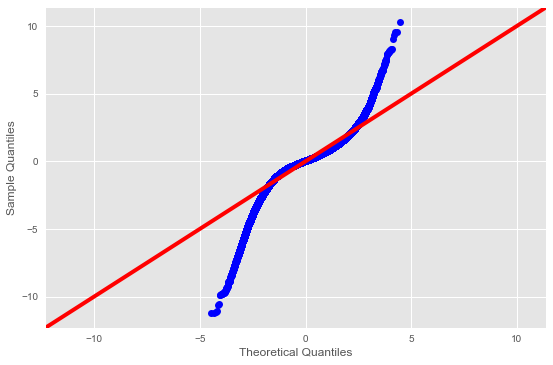

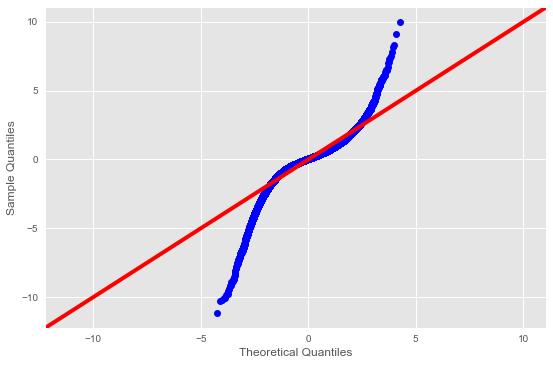

In [1297]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')



resid1 = y_hat_train - y_train
resid2 = y_hat_test - y_test
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)

In [1423]:
lower_mae, upper_mae = (abs(resid2).mean() - 1.96 * (abs(resid2).std() / np.sqrt(y_test.size)),abs(resid2).mean() + 1.96 * (abs(resid2).std() / np.sqrt(y_test.size)))

In [1424]:
lower_mae

3112.080545707029

In [1425]:
upper_mae

3157.734561353537

In [1430]:
lower_lim = (abs(resid2).mean() + 1.5 * abs(resid2).std())

In [1439]:
bool_underval = ((resid2 > 0) & (abs(resid2) > lower_lim))

In [1440]:
y_test[bool_underval][:5]

374824     4700
28149     10000
180420    34536
152178     2000
195191     5500
Name: price, dtype: int64

In [1441]:
y_hat_test[bool_underval][:5]

array([16447.61439526, 19341.39756787, 44158.68736279, 11626.10871899,
       14383.56788647])

In [1446]:
df.iloc[28149]

id                                                       7120729088
url               https://phoenix.craigslist.org/cph/ctd/d/phoen...
region                                                      phoenix
region_url                           https://phoenix.craigslist.org
price                                                         10000
year                                                           2011
manufacturer                                                    bmw
condition                                                      good
cylinders                                               6 cylinders
fuel                                                            gas
odometer                                                      76672
title_status                                                  clean
transmission                                                 manual
vin                                                               1
drive                                           

# RFECV